1. Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)
df = pd.read_csv("netflix_titles.csv")  # Place this file in the same folder



2. Overview of the Dataset and Cleaning

In [33]:
print("🔹 Shape of dataset:", df.shape)
print("\n🔹 Column names:", df.columns.tolist())
print("\n🔹 Data types:\n", df.dtypes)
print("\n🔹 Missing values (BEFORE cleaning):\n", df.isnull().sum())


🔹 Shape of dataset: (8807, 12)

🔹 Column names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

🔹 Data types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

🔹 Missing values (BEFORE cleaning):
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


3. After CLeaning 

In [35]:
# Clean basic fields
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Clean and convert 'date_added'
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].fillna(df['date_added'].min())
df['year_added'] = df['date_added'].dt.year

# Clean 'duration'
df['duration'] = df['duration'].astype(str).str.strip()
df['duration'] = df['duration'].replace(["Unknown", "nan", "None", "NaN", "", np.nan], "0 min")

# Extract minutes
df['duration_mins'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Replace 0 and NaN values with median duration
median_duration = df['duration_mins'].median()
df['duration_mins'] = df['duration_mins'].replace(0, median_duration)
df['duration_mins'] = df['duration_mins'].fillna(median_duration)
print("✅ Missing values (AFTER cleaning):\n", df.isnull().sum())



✅ Missing values (AFTER cleaning):
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added       0
duration_mins    0
dtype: int64


4. Statistics Summary

In [23]:
print("\n📊 Summary Statistics:\n", df.describe())
print("\n📺 Movie vs TV Show Count:\n", df['type'].value_counts())
print("\n🌍 Top 10 Countries by Content:\n", df['country'].value_counts().head(10))
print("\n🔒 Top 10 Ratings:\n", df['rating'].value_counts().head(10))
print("\n🎬 Top 10 Genres:\n", df['listed_in'].value_counts().head(10))



📊 Summary Statistics:
                           date_added  release_year   year_added  duration_mins
count                           8807   8807.000000  8807.000000    8807.000000
mean   2019-05-12 12:46:40.862949888   2014.180198  2018.859544      69.853071
min              2008-01-01 00:00:00   1925.000000  2008.000000       1.000000
25%              2018-04-03 00:00:00   2013.000000  2018.000000       2.000000
50%              2019-07-01 00:00:00   2017.000000  2019.000000      88.000000
75%              2020-08-18 00:00:00   2019.000000  2020.000000     106.000000
max              2021-09-25 00:00:00   2021.000000  2021.000000     312.000000
std                              NaN      8.819312     1.615395      50.807276

📺 Movie vs TV Show Count:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

🌍 Top 10 Countries by Content:
 country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada            

5. Count of Movies vs TV Shows

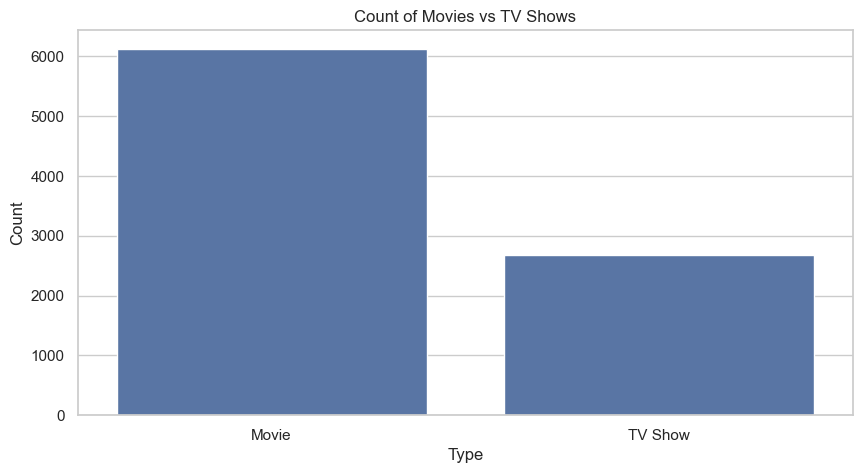

In [24]:
sns.countplot(x='type', data=df)
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


6. Movie Duration Distribution

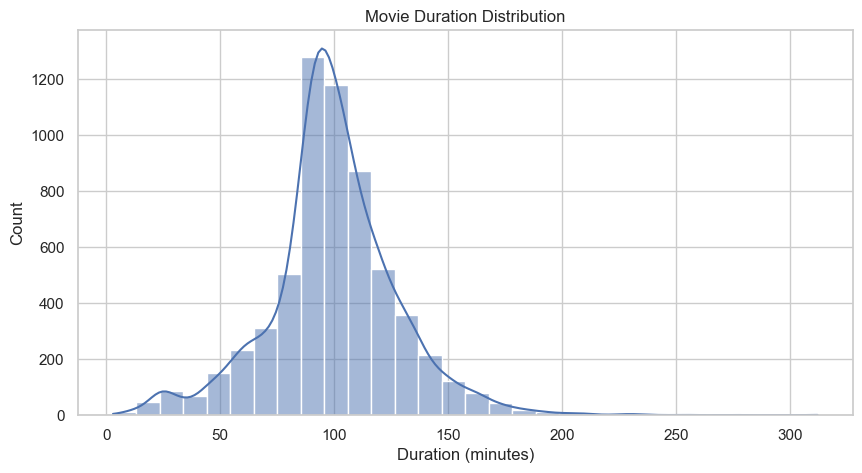

In [25]:
sns.histplot(movie_df['duration_mins'], bins=30, kde=True)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()


7. Top 5 Content Ratings

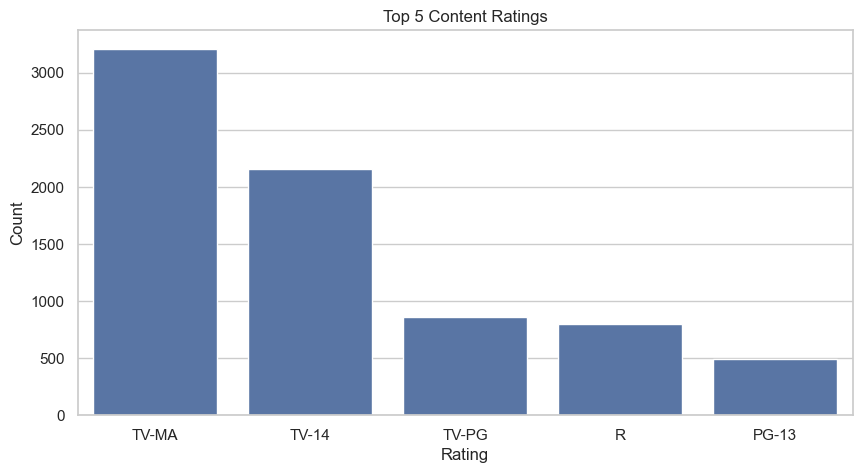

In [26]:
top_ratings = df['rating'].value_counts().nlargest(5).index
sns.countplot(data=df[df['rating'].isin(top_ratings)], x='rating', order=top_ratings)
plt.title('Top 5 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


8. Boxplot of Movie Durations

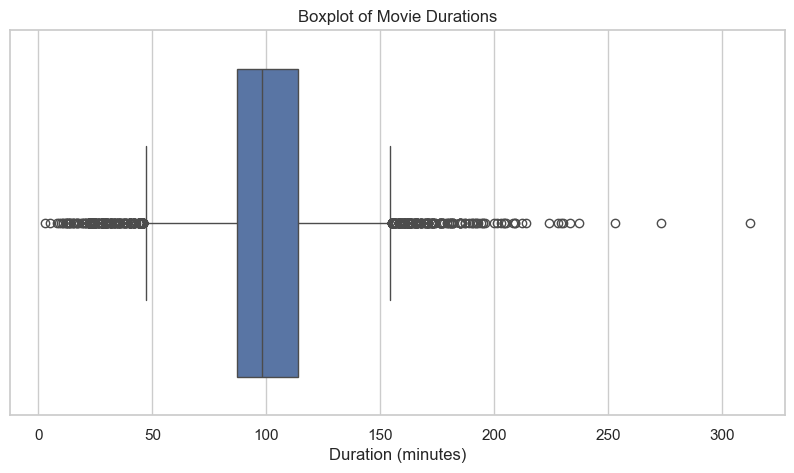

In [27]:
sns.boxplot(x=movie_df['duration_mins'])
plt.title('Boxplot of Movie Durations')
plt.xlabel("Duration (minutes)")
plt.show()


9. Top 5 Countries with Most Content

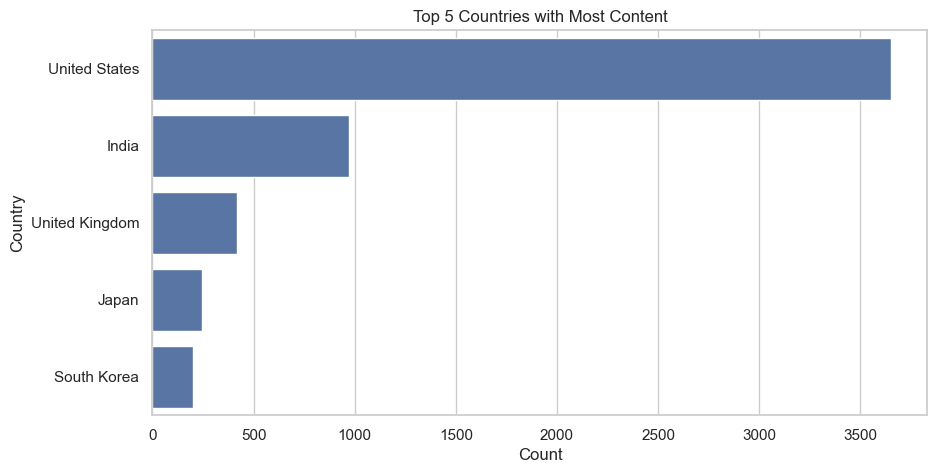

In [28]:
top_countries = df['country'].value_counts().nlargest(5).index
sns.countplot(data=df[df['country'].isin(top_countries)], y='country', order=top_countries)
plt.title('Top 5 Countries with Most Content')
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


10. Netflix Titles Added Over the Years

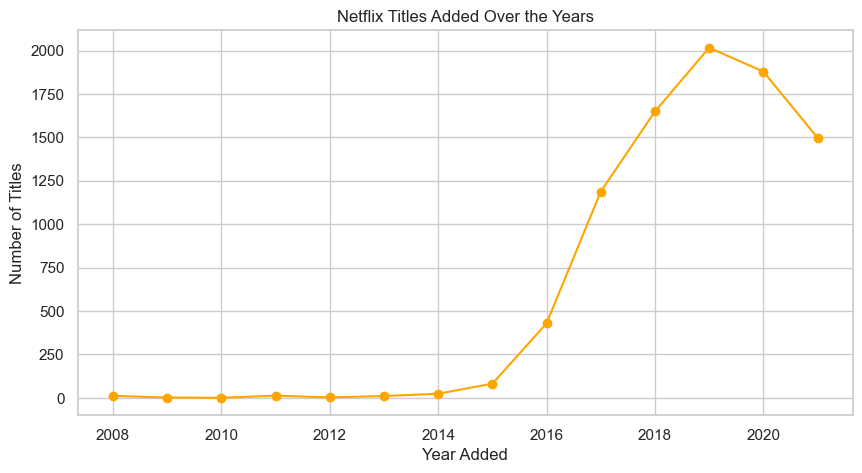

In [29]:
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Netflix Titles Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


11. Correlation Heatmap

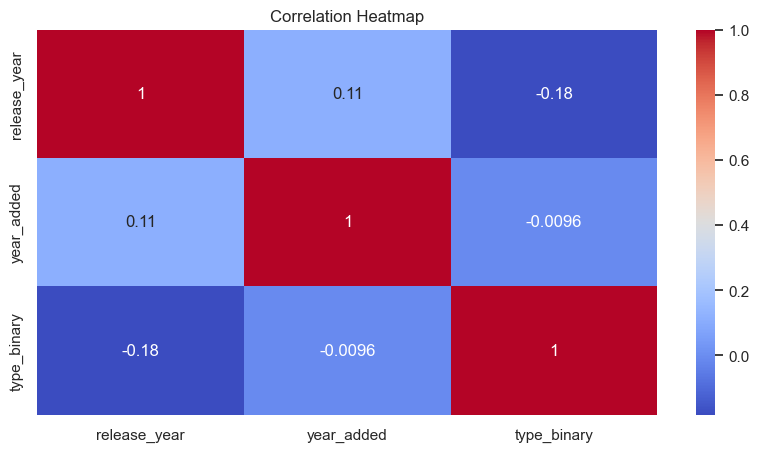

In [36]:
df['type_binary'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
sns.heatmap(df[['release_year', 'year_added', 'type_binary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
